### Arimoto-Blahut Algorithm for Rate-Distortion

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [11]:
def p_exp(e,x):
    """
    Practical exponentiation
    returns 1 if given 0 to the power 0
    """
    if e == 0 and x == 0:
        return 1
    else:
        return e**x

In [12]:
def entropy_1(px):
    """
    Entropy count of one variable vector
    Input: probability
    Output: entropy in nats
    """
    Hx = []
    for i in range(len(px)):
        if px[i] == 0:
            Hx.append(0)
        else:
            Hx.append(-px[i]*np.log(px[i]))
    return np.sum(Hx)

In [13]:
def entropy_2(pxy):
    """
    Entropy count of two variable matrix
    Input: joint probability
    Output: joint entropy in nats
    """
    Hxy = []
    for i in range(len(pxy)):
        for j in range(len(pxy[0])):
            if pxy[i][j] == 0:
                Hxy.append(0)
            else:
                Hxy.append(-pxy[i][j]*np.log(pxy[i][j]))
    return np.sum(Hxy)

In [14]:
def rate(pxy, entropy_2, entropy_1):
    """
    Capacity count of two variables
    Input: joint distribution
    Output: mutual information in bits
    """
    Hxy = entropy_2(pxy)
    Hy = entropy_1(np.sum(pxy, axis=0))
    Hx = entropy_1(np.sum(pxy, axis=1))
    return (Hx+Hy-Hxy)/np.log(2)

In [31]:
def gen_pygx(py, dxxh, lam, sx, sy):
    """
    Generation of optimum channel
    Input: output probability, distortion matrix, and lambda value
    Output: optimum channel
    """
    pygx = np.zeros((sx, sy))
    for i in range(sx):
        my = 0
        for j in range(sy):
            my += py[j]*np.exp(lam*dxxh[i][j])
        for j in range(sy):
            pygx[i][j] = py[j]*np.exp(lam*dxxh[i][j])/my
    return pygx

In [29]:
def gen_npy(px, pygx, sy, sx):
    """
    Generation of optimum output distribution
    Input: channel (pygx) and px
    Output: optimum py
    """
    npy = []
    for i in range(sy):
        pyc = 0
        for j in range(sx):
            pyc += px[j]*pygx[j][i]
        npy.append(pyc)
    npy = npy/np.sum(npy)
    return npy

In [17]:
def gen_pxy(pygx, px, sx, sy):
    """
    Generation of joint probability
    Input: channel and input distribution
    Output: joint probability pxy
    """
    pxy = np.zeros((sx,sy))
    for i in range(sx):
        for j in range(sy):
            pxy[i][j] = pygx[i][j]*px[i]
    return pxy

In [30]:
def gen_D(pxy, dxxh):
    """
    Calculation of distortion
    Input: joint probability and distortion matrix
    Output: distortion value"""
    return np.sum(pxy*dxxh)

In [19]:
def AB_Rate(px, dxxh, lams, gen_pygx, gen_npy, gen_pxy, rate, gen_D, entropy_2, entropy_1):
    """
    Arimoto-Blahut algorithm for searching rate distortion of given input and distortion matrix
    Uses uniform distribution as first guess
    Stops when output distribution is converged
    Input: input distribution and distortion matrix
    Output: rate-distortion pairs
    """
    sx = len(dxxh)
    sy = len(dxxh[0])
    rates = []
    Ds = []
    npy = []
    for i in range(sy):
        npy.append(1/sy)
    for k in range(len(lams)):
        py = np.zeros(sy)
        while np.linalg.norm(npy-py) > 10**-6:
            py = npy
            pygx = gen_pygx(py, dxxh, lams[k], sx, sy)
            npy = gen_npy(px, pygx, sy, sx)
        py = npy
        pxy = gen_pxy(pygx, px, sx, sy)
        rat = rate(pxy, entropy_2, entropy_1)
        D = gen_D(pxy, dxxh)
        rates.append(rat)
        Ds.append(D)
    return rates, Ds

In [48]:
px = np.array([0.2, 0.8])
dxxh = np.array([[0, 1],
                [1, 0]])
lams = np.arange(-5, 0, 0.1)
R, D = AB_Rate(px, dxxh, lams, gen_pygx, gen_npy, gen_pxy, rate, gen_D, entropy_2, entropy_1)

In [49]:
def h(p):
    """
    Binary entropy function
    Input: one of two probability in the binary probability distribution
    Output: binary entropy of input probability
    """
    hp = -p*np.log(p)-(1-p)*np.log(1-p)
    return hp/np.log(2)
def maximum(a,b):
    """
    Choose maximum number from two inputs
    """
    if a < b:
        return b
    else:
        return a

In [52]:
d = np.arange(0.01, 0.2, 0.01)
Rt = []
for i in range(len(d)):
    Rt.append(maximum(h(0.8)-h(d[i]),0))

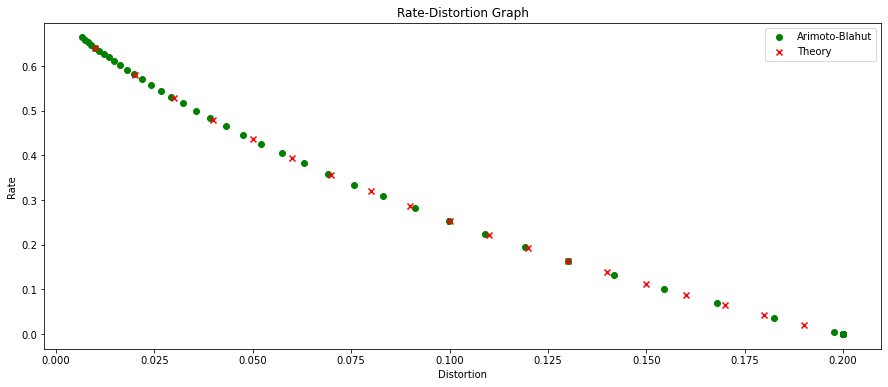

In [53]:
plt.figure(figsize=(15,6))
plt.scatter(D,R, color ="green", label="Arimoto-Blahut", marker='o')
plt.scatter(d,Rt, color="red", label="Theory", marker='x')
plt.title("Rate-Distortion Graph")
plt.xlabel("Distortion")
plt.ylabel('Rate')
plt.legend()
plt.show()

In [54]:
px = np.array([1/3, 1/3, 1/3])
dxxh = np.array([[0, 1, 4],
                [1, 0, 1],
                [4, 1, 0]])
lams = np.arange(-20, 0, 0.01)
R, D = AB_Rate(px, dxxh, lams, gen_pygx, gen_npy, gen_pxy, rate, gen_D, entropy_2, entropy_1)

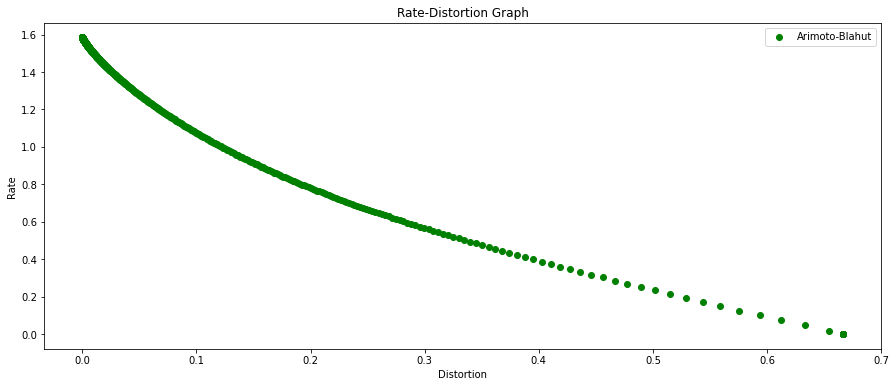

In [55]:
plt.figure(figsize=(15,6))
plt.scatter(D,R, color ="green", label="Arimoto-Blahut", marker='o')
plt.title("Rate-Distortion Graph")
plt.xlabel("Distortion")
plt.ylabel('Rate')
plt.legend()
plt.show()

In [56]:
print("Our best approximation of R(0) is:", R[0])
print("with D equal to:", D[0])
print("Theoretically, R(0) is log(3) =", np.log(3)/np.log(2))

Our best approximation of R(0) is: 1.584962417459905
with D equal to: 2.748204821421369e-09
Theoretically, R(0) is log(3) = 1.5849625007211563


In [57]:
print("Our calculated D* is:", D[R.index(min(R))])
print("with R equal to:", min(R), ", approximately 0")

Our calculated D* is: 0.6666666667542175
with R equal to: 1.7298503120600557e-14 , approximately 0
